# Making Estimations with our NBA dataset

In our first project, we learn how to create our own datasets by using a public API, Python and Pandas. We're now going to explore how to make predictive models for regression and classification tasks using ScikitLearn

The goals of this project are:
- Learn how to define a prediction task
- Selecting evaluation metrics and baseline models
- Perform feature engineering and standarization
- Analyze when to apply Dimensionality Reduction
- Training and using predictive models: Multivariate Linear Regression and Decision Tree Regressor
- Understand how to tune the hyperparameters of your learning algorithm diagnosing Bias and Variance

## Using Regression Models to Estimate players Salaries

A player's salary can be explained by a lot of factors: 

- Years in the league: NBA contracts are limited in price, players have caps on how much money they make depending on their years playing in the league
- Age: Highly correlated to the previous one, NBA players have a minimun age of 19 years
- Draft position: players out of USA universities are selected each year through a process called draft, in which each team selects a player in a predefined order for 2 rounds (meaning only 60 players are drafted each year). A rookie contract value depends on the draft position. (Undrafted players have to negotiate a salary independently)
- Performance in statistical categories: after the rookie contract, players can negotiate freely with teams, and usually statistical categories like points, rebounds and assists are extremely important.  
- Team: Even though there are limits to what all teams can expend in players salary, they all allocate their resources differently, and can be more willing to pay the penalties incurred by exceeding those limitations.
- Year in which the contract was signed: the mininum and maximum values of contracts possibles in the NBA changes depending on league revenue (television contracts, sponsorships, etc), so if the amount of money the teams make increases, players can negotiate bigger contracts.
- Intangibles: players can be valued also in things that are not easily translated to a statistic, good defensive players might not always have great stats but can be extremely important for a team, the same can be said about veteran players that help young ones to learn and are good locker-room guys.

But we're going to take a simplified approach, we'll try to use the data we already have to make the best estimator possible, and then we will analyze what went right and what could've gone wrong with our results.

### Analyzing our data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import aux, visualizations, preprocessing
%matplotlib inline

In [3]:
data = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/NBAPredictions/nba_players_processed_dataset.csv")
data

,PLAYER_ID,PLAYER_NAME,TEAM_NAME,COUNTRY,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,GAME_DATE,BIRTHDATE,HEIGHT,WEIGHT,AGE,POSITION
0,1630173,Precious Achiuwa,Raptors,Nigeria,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,NaN,1999-09-19,203,102.0,"Years=22,Months=8,Days=20",Forward
1,203500,Steven Adams,Grizzlies,New Zealand,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,2022-05-03,1993-07-20,210,120.0,"Years=28,Months=10,Days=21",Center
2,1628389,Bam Adebayo,Heat,USA,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,2022-05-04,1997-07-18,205,115.0,"Years=24,Months=10,Days=22",Center
3,1630583,Santi Aldama,Grizzlies,Spain,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,2022-05-03,2001-01-10,210,97.0,"Years=21,Months=4,Days=28",Forward
4,200746,LaMarcus Aldridge,Nets,USA,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,NaN,1985-07-19,210,113.0,"Years=36,Months=10,Days=24",Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1626153,Delon Wright,Hawks,USA,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,8526316,NaN,1992-04-26,195,83.0,"Years=30,Months=1,Days=14",Guard
442,201152,Thaddeus Young,Raptors,USA,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000,NaN,1988-06-21,203,106.0,"Years=33,Months=11,Days=20",Forward
443,1629027,Trae Young,Hawks,USA,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471,NaN,1998-09-19,185,74.0,"Years=23,Months=8,Days=20",Guard
444,1630209,Omer Yurtseven,Heat,Turkey,0,-1,56,12.6,5.3,5.3,0.9,0.3,0.4,1489065,2022-05-04,1998-06-19,210,124.0,"Years=23,Months=11,Days=20",Center


# Exploratory Data Analysis

## Dataset Basics

Show the shape of the dataset

In [336]:
print("The shape of the dataset is:",data.shape, "\n")

The shape of the dataset is: (446, 20) 



Data type of the features

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PLAYER_ID     446 non-null    int64  
 1   PLAYER_NAME   446 non-null    object 
 2   TEAM_NAME     446 non-null    object 
 3   COUNTRY       446 non-null    object 
 4   SEASON_EXP    446 non-null    int64  
 5   DRAFT_NUMBER  446 non-null    int64  
 6   GP            446 non-null    int64  
 7   MIN           446 non-null    float64
 8   PTS           446 non-null    float64
 9   REB           446 non-null    float64
 10  AST           446 non-null    float64
 11  STL           446 non-null    float64
 12  BLK           446 non-null    float64
 13  SALARY        446 non-null    int64  
 14  GAME_DATE     117 non-null    object 
 15  BIRTHDATE     446 non-null    object 
 16  HEIGHT        446 non-null    int64  
 17  WEIGHT        446 non-null    float64
 18  AGE           446 non-null    

There are some feature that will not be useful for future analysis and some others that need a Data type Transformation

In [4]:
#Elimination
del data["PLAYER_ID"]
del data["BIRTHDATE"]
del data["GAME_DATE"]
del data["PLAYER_NAME"]

#Tranforming AGE into a single Integer value
for i, column in data.iterrows():
    test = data.loc[i, "AGE"]
    separator = ',Months'
    head, sep, tail = test.partition(separator)
    waste, sep, age = head.partition("=")
    data.loc[i, "AGE"] = int(age)

print("The shape of the dataset is:",data.shape)

The shape of the dataset is: (446, 16)


Checking Missing Values

In [370]:
data.isnull().sum()

TEAM_NAME       0
COUNTRY         0
SEASON_EXP      0
DRAFT_NUMBER    0
GP              0
MIN             0
PTS             0
REB             0
AST             0
STL             0
BLK             0
SALARY          0
HEIGHT          0
WEIGHT          0
AGE             0
POSITION        0
dtype: int64

## Visualizations

Histogram of all the features

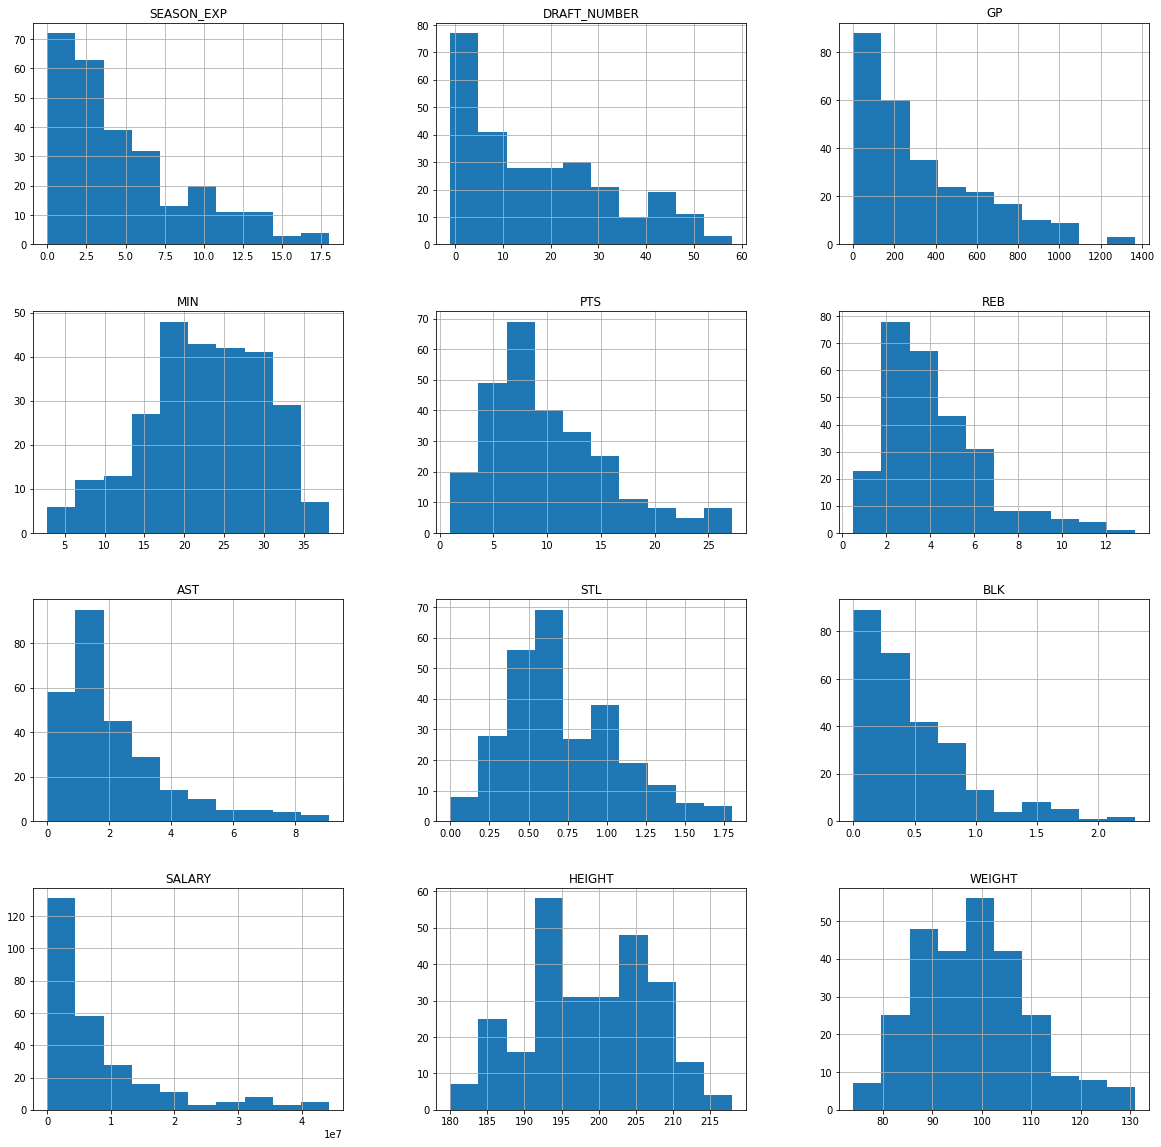

In [340]:
visualizations.hist_all_features(data)

## Descriptive Statistics

**Measures of Central Tendency**

The measures of central tendency show the central or middle values of datasets. There are several definitions of what’s considered to be the center of a dataset. In this tutorial, you’ll learn how to identify and calculate these measures of central tendency:

- Mean
- Weighted mean
- Median
- Mode

### Mean

The sample mean, also called the sample arithmetic mean or simply the average, is the arithmetic average of all the items in a dataset. The mean of a dataset 𝑥 is mathematically expressed as Σᵢ𝑥ᵢ/𝑛, where 𝑖 = 1, 2, …, 𝑛. In other words, it’s the sum of all the elements 𝑥ᵢ divided by the number of items in the dataset 𝑥.

In [176]:
aux.mean(data)

The mean of SEASON_EXP is 4.72
The mean of DRAFT_NUMBER is 17.57
The mean of GP is 336.65
The mean of MIN is 22.44
The mean of PTS is 10.13
The mean of REB is 4.07
The mean of AST is 2.17
The mean of STL is 0.73
The mean of BLK is 0.47
The mean of SALARY is 8728325.71
The mean of HEIGHT is 198.58
The mean of WEIGHT is 97.74
The mean of AGE is 26.22


### Weighted Mean

The weighted mean is a generalization of the arithmetic mean that enables you to define the relative contribution of each data point to the result.

You define one weight 𝑤ᵢ for each data point 𝑥ᵢ of the dataset 𝑥, where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in 𝑥. Then, you multiply each data point with the corresponding weight, sum all the products, and divide the obtained sum with the sum of weights: Σᵢ(𝑤ᵢ𝑥ᵢ) / Σᵢ𝑤ᵢ.

This is a more detailed analysis, it is commonly use on feautures were you have a reduce amount of values. On our analysis it could be done with the "Seasons Experience", just to put an example.

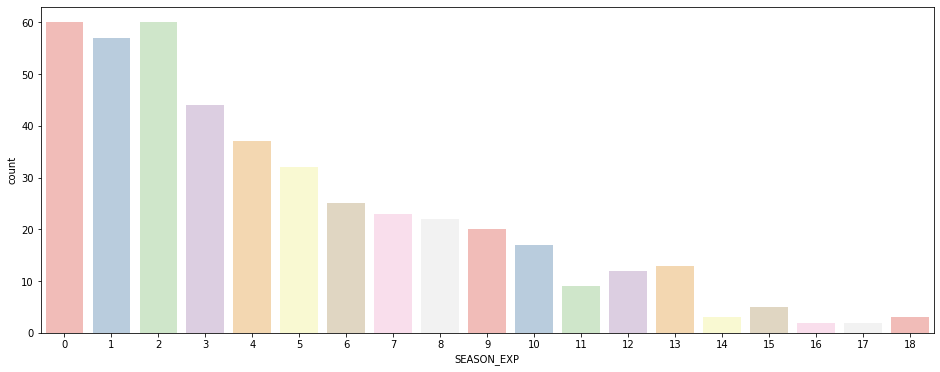

In [200]:
visualizations.value_counts(data, "SEASON_EXP")

In [203]:
feature_vals, weights = aux.feature_vals_and_weights(data, "SEASON_EXP")

The rounded percentage of the value 0 is of 13.450000000000001 %
The rounded percentage of the value 2 is of 13.450000000000001 %
The rounded percentage of the value 1 is of 12.78 %
The rounded percentage of the value 3 is of 9.87 %
The rounded percentage of the value 4 is of 8.3 %
The rounded percentage of the value 5 is of 7.17 %
The rounded percentage of the value 6 is of 5.609999999999999 %
The rounded percentage of the value 7 is of 5.16 %
The rounded percentage of the value 8 is of 4.93 %
The rounded percentage of the value 9 is of 4.4799999999999995 %
The rounded percentage of the value 10 is of 3.81 %
The rounded percentage of the value 13 is of 2.91 %
The rounded percentage of the value 12 is of 2.69 %
The rounded percentage of the value 11 is of 2.02 %
The rounded percentage of the value 15 is of 1.1199999999999999 %
The rounded percentage of the value 18 is of 0.67 %
The rounded percentage of the value 14 is of 0.67 %
The rounded percentage of the value 17 is of 0.4499999999

In [204]:
w_mean = aux.weighted_mean(feature_vals, weights)
print("The Weighted Mean of the Seasons Experience is of", w_mean)

The Weighted Mean of the Seasons Experience is of 4.715246636771301


### Median

The sample median is the middle element of a sorted dataset. The dataset can be sorted in increasing or decreasing order. If the number of elements 𝑛 of the dataset is odd, then the median is the value at the middle position: 0.5(𝑛 + 1). If 𝑛 is even, then the median is the arithmetic mean of the two values in the middle, that is, the items at the positions 0.5𝑛 and 0.5𝑛 + 1.

In [208]:
aux.median(data)

The meadian of SEASON_EXP is 4.0
The meadian of DRAFT_NUMBER is 13.5
The meadian of GP is 241.5
The meadian of MIN is 22.65
The meadian of PTS is 9.0
The meadian of REB is 3.6
The meadian of AST is 1.6
The meadian of STL is 0.7
The meadian of BLK is 0.3
The meadian of SALARY is 4405080.0
The meadian of HEIGHT is 198.0
The meadian of WEIGHT is 97.0
The meadian of AGE is 25.0


### Mode

The sample mode is the value in the dataset that occurs most frequently. If there isn’t a single such value, then the set is multimodal since it has multiple modal values. 

In [212]:
aux.mode(data)

The mode of SEASON_EXP is 0
The mode of DRAFT_NUMBER is -1
The mode of GP is 134
The mode of MIN is 20.9
The mode of PTS is 7.6
The mode of REB is 3.0
The mode of AST is 1.0
The mode of STL is 0.7
The mode of BLK is 0.2
The mode of SALARY is 1517981
The mode of HEIGHT is 195
The mode of WEIGHT is 97.0
The mode of AGE is 24


## Measures of Variability

The measures of central tendency aren’t sufficient to describe data. You’ll also need the measures of variability that quantify the spread of data points. In this section, you’ll learn how to identify and calculate the following variability measures:

- Variance
- Standard deviation
- Skewness
- Percentiles

### Variance

The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean. You can express the sample variance of the dataset 𝑥 with 𝑛 elements mathematically as 𝑠² = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1), where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥.

Now you can intuitively understand that if this value is less, it means that on average, every score has low difference with the mean. Hence, we can conclude that all the scores are approximately close to the mean. If however the variance is high, we know that there are a lot of extreme values, and the mean is a poor estimate of the actual scores.

In [215]:
aux.variance(data)

The variance of SEASON_EXP is 17.33221645588754
The variance of DRAFT_NUMBER is 260.28552426059355
The variance of GP is 81605.15062226029
The variance of MIN is 59.1554876807578
The variance of PTS is 29.147073713911425
The variance of REB is 4.927323021111502
The variance of AST is 2.9515310626291127
The variance of STL is 0.13488103995566084
The variance of BLK is 0.16683266992492565
The variance of SALARY is 99775469888807.4
The variance of HEIGHT is 68.432428074772
The variance of WEIGHT is 124.68489948102989
The variance of AGE is 19.871965536353102


### Standard Deviation

The sample standard deviation is another measure of data spread. It’s connected to the sample variance, is the positive square root of it. The standard deviation is often more convenient than the variance because it has the same unit as the data points and you will be dealing with smaller values.

In [218]:
aux.std_deviation(data)

The Standard Deviation of SEASON_EXP is 4.163197864128913
The Standard Deviation of DRAFT_NUMBER is 16.133366798675148
The Standard Deviation of GP is 285.6661523916691
The Standard Deviation of MIN is 7.691260474119818
The Standard Deviation of PTS is 5.398802988988525
The Standard Deviation of REB is 2.2197574239343143
The Standard Deviation of AST is 1.7180020554787216
The Standard Deviation of STL is 0.3672615416234878
The Standard Deviation of BLK is 0.40845155150265455
The Standard Deviation of SALARY is 9988767.185634442
The Standard Deviation of HEIGHT is 8.272389502119204
The Standard Deviation of WEIGHT is 11.166239272066038
The Standard Deviation of AGE is 4.457798283497483


As you can observe, these values are the sqaured root values of its own variance previouly calculated

### Skewness

The sample skewness measures the asymmetry of a data sample.

Usually, negative skewness values indicate that there’s a dominant tail on the left side. Positive skewness values correspond to a longer or fatter tail on the right side. If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.

In [220]:
aux.skewness(data)

The Skewness of SEASON_EXP is 0.9466932818532096
The Skewness of DRAFT_NUMBER is 0.5883654122668198
The Skewness of GP is 1.0498936039787734
The Skewness of MIN is -0.3833019388441366
The Skewness of PTS is 0.8013038033994712
The Skewness of REB is 1.2027486859914376
The Skewness of AST is 1.5895385478807496
The Skewness of STL is 0.6535360035723834
The Skewness of BLK is 1.8762969413855932
The Skewness of SALARY is 1.7211285799568365
The Skewness of HEIGHT is -0.0634886116410146
The Skewness of WEIGHT is 0.42658740523119154
The Skewness of AGE is 0.538975937608559


### Percentiles

The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value. If there are two such elements in the dataset, then the sample 𝑝 percentile is their arithmetic mean. Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:

- The first quartile (Q1) is the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.
- The second quartile is the sample 50th percentile or the median. Approximately 25% of the items lie between the first and second quartiles and another 25% between the second and third quartiles.
- The third quartile (Q3) is the sample 75th percentile. It divides roughly 25% of the largest items from the rest of the dataset.


In [357]:
aux.percentiles(data)

The percentiles of SEASON_EXP is [1. 4. 7.]
The percentiles of DRAFT_NUMBER is [ 3.  13.5 30. ]
The percentiles of GP is [115.  241.5 511. ]
The percentiles of MIN is [17.35 22.65 28.7 ]
The percentiles of PTS is [ 6.2  9.  13.4]
The percentiles of REB is [2.5 3.6 5.1]
The percentiles of AST is [1.  1.6 2.9]
The percentiles of STL is [0.5 0.7 0.9]
The percentiles of BLK is [0.2 0.3 0.6]
The percentiles of SALARY is [ 2000000.  4405080. 11903832.]
The percentiles of HEIGHT is [193. 198. 205.]
The percentiles of WEIGHT is [ 90.  97. 105.]
The percentiles of AGE is [23.0 25.0 29.0]


It is very didactic to code my own functions to evaluate this metrics, also useful for some cases I just want to see some in specific.
But, let´s see a way of doing it with a pandas method way faster and easier...

In [120]:
data.describe()

,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,HEIGHT,WEIGHT
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,4.460000e+02,446.00000,446.000000
mean,4.715247,17.573991,336.645740,22.438117,10.126457,4.074888,2.165247,0.732735,0.468610,8.728326e+06,198.58296,97.735426
std,4.163198,16.133367,285.666152,7.691260,5.398803,2.219757,1.718002,0.367262,0.408452,9.988767e+06,8.27239,11.166239
min,0.000000,-1.000000,2.000000,2.800000,1.000000,0.500000,0.000000,0.000000,0.000000,5.318000e+03,175.00000,72.000000
25%,1.000000,3.000000,115.000000,17.350000,6.200000,2.500000,1.000000,0.500000,0.200000,2.000000e+06,193.00000,90.000000
50%,4.000000,13.500000,241.500000,22.650000,9.000000,3.600000,1.600000,0.700000,0.300000,4.405080e+06,198.00000,97.000000
75%,7.000000,30.000000,511.000000,28.700000,13.400000,5.100000,2.900000,0.900000,0.600000,1.190383e+07,205.00000,105.000000
max,18.000000,60.000000,1366.000000,38.200000,27.200000,13.300000,9.500000,2.100000,2.300000,4.578097e+07,220.00000,131.000000


There are some metrics missing, but for most of the cases thi will do the work. Let´s see why we want this values and how to visualize them using **Box Plots**

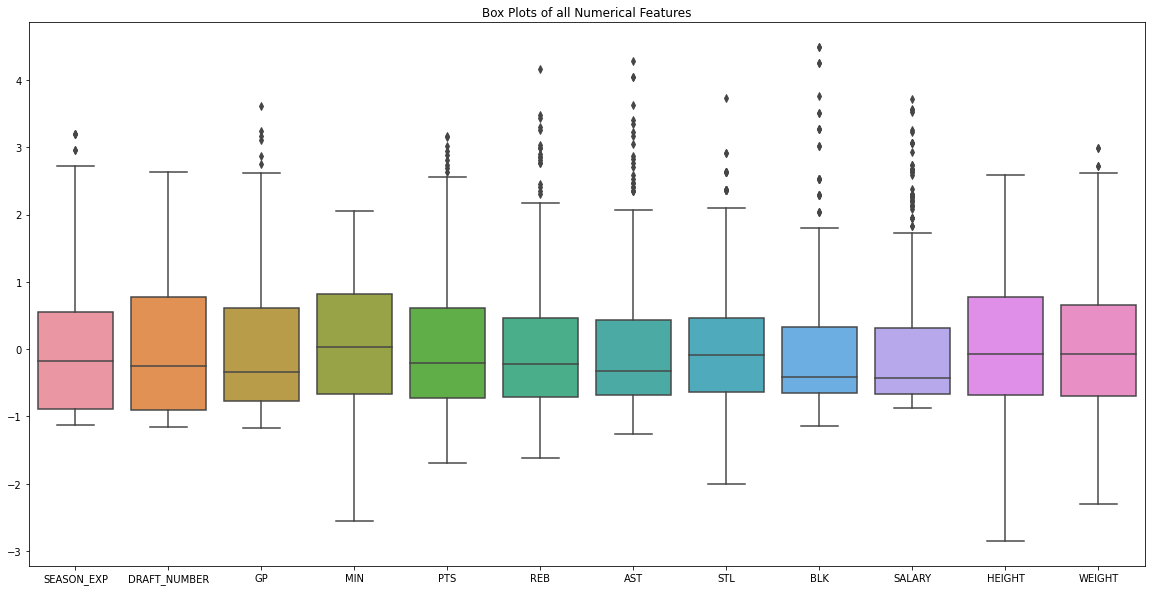

In [426]:
visualizations.boxplot_all_features(data)

The boxes start from the Q1 up until Q3. The Median (Q2), is the line crossing the box. The upper and lower horizontal lines are the minimum (Q1 -1.5*IQR) and maximum (Q3 + 1.5*IQR).

All the box (Q3 - Q1) is what makes the Interquartile Range, which contains 50% of the data. Then from the Minimim up until the Q1, there is 24.65% of the Data. The same from Q3 to the Maximum.

This leave us with a 0.7% missing data, which is known as the **Outliers**. They tend to harm the Model performance, as it hinders it to generalize well. They will be deleted on the preprocessing step

## Measures of Correlation Between Pairs of Data

You’ll often need to examine the relationship between the corresponding elements of two variables in a dataset. Say there are two variables, 𝑥 and 𝑦, with an equal number of elements, 𝑛. Let 𝑥₁ from 𝑥 correspond to 𝑦₁ from 𝑦, 𝑥₂ from 𝑥 to 𝑦₂ from 𝑦, and so on. You can then say that there are 𝑛 pairs of corresponding elements: (𝑥₁, 𝑦₁), (𝑥₂, 𝑦₂), and so on.

You’ll see the following measures of correlation between pairs of data:

- Positive correlation exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.
- Negative correlation exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.
- Weak or no correlation exists if there is no such apparent relationship.

The two statistics that measure the correlation between datasets are **covariance** and the **correlation coefficient**.

### Covariance

The sample covariance is a measure that quantifies the strength and direction of a relationship between a pair of variables:

- If the correlation is positive, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
- If the correlation is negative, then the covariance is negative, as well. A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
- If the correlation is weak, then the covariance is close to zero.

In [236]:
aux.covariance_matrix(data["PTS"], data["SALARY"])

The Coviarance Matrix between this two features is: 
 [[2.91470737e+01 3.92597029e+07]
 [3.92597029e+07 9.97754699e+13]]


The top left value [0, 0] is the Variance of the first feature (PTS) and the corner right [1, 1] of the second feature (SALARY). 
Then the [0 1] and [1 0] values is the Covariance between this two features. 

We can observe there is a Positive Relationship, let´s see it graphically

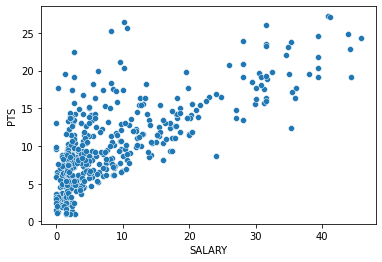

In [237]:
visualizations.correlation_scatterplot(data=data, x=data['SALARY']/1000000, y=data['PTS'])

### Correlation Coefficient

The correlation coefficient is another measure of the correlation between data. You can think of it as a standardized covariance. Here are some important facts about it:

- The value 𝑟 > 0 indicates positive correlation.
- The value 𝑟 < 0 indicates negative correlation.
- The value r = 1 is the maximum possible value of 𝑟. It corresponds to a perfect positive linear relationship between variables.
- The value r = −1 is the minimum possible value of 𝑟. It corresponds to a perfect negative linear relationship between variables.
- The value r ≈ 0, or when 𝑟 is around zero, means that the correlation between variables is weak.

In [261]:
a = aux.correlation_matrix(data["PTS"], data["SALARY"])

The Correlation Matrix between this two features is: 
 [[1.         0.72801049]
 [0.72801049 1.        ]]


We will use the Correlational Coeficient which is clear and easily comparable between diferent pair of features.

Let´s see the Correlation of each feature with the Salary.

In [274]:
aux.fts_correlation_y(data, data["SALARY"])

Correlation between SEASON_EXP and the label is 0.48232904463386
Correlation between DRAFT_NUMBER and the label is -0.1674656643365417
Correlation between GP and the label is 0.5133910124703885
Correlation between MIN and the label is 0.6408096352937237
Correlation between PTS and the label is 0.7280104910012525
Correlation between REB and the label is 0.4292829930050432
Correlation between AST and the label is 0.5556180622555951
Correlation between STL and the label is 0.5294196126689031
Correlation between BLK and the label is 0.23284235006130766
Correlation between SALARY and the label is 1.0
Correlation between HEIGHT and the label is 0.01970211290763181
Correlation between WEIGHT and the label is 0.09287879724256431
Correlation between AGE and the label is uncalculable
Correlation between AGE and the label is 0.09287879724256431


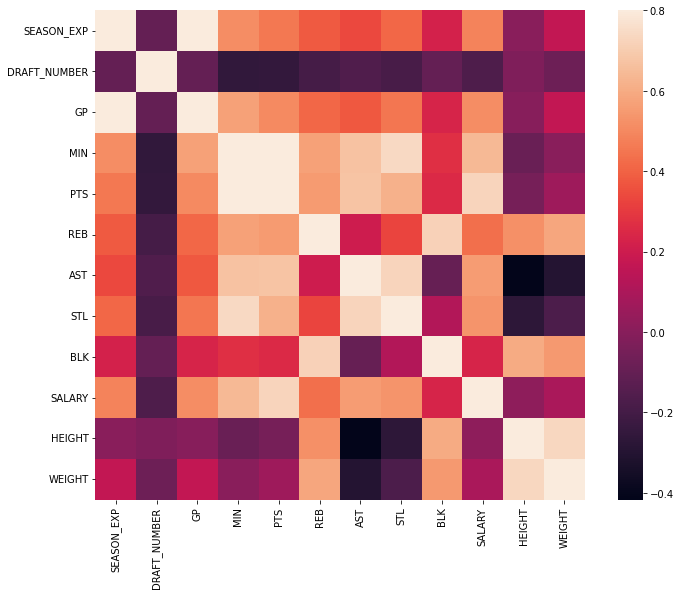

In [277]:
#Correlation matrix Visualization
visualizations.corr_matrix(data)

Here we can observe the Correlation between all Features

### Conclutions about the In-Game Data in consideration of the Salary

Let's start by clarifying which are the In-Game Features (REB, AST, STL, BLK and PTS). Each one of these features have players who are earning an average or low contract, and are leading in the different statistics. So, there does not seem to be a direct relationship between performing well and how much you earn.

I believe this is due to three things, mainly to the **Rookies**, who earn contracts predetermined by the NBA for the first 4 
years of their career regardless of their performance. 

Then, due to the **"Revelation Players"**. What do I mean by this?. 
Players from other leagues who came to play in the NBA as promises and are doing well, or even players who came from bad seasons (that's why they probably
have low contracts) and maybe this year they started to play a lot better for different reasons, such as having found a technician who makes him 
shine more, self-motivation of aiming to stand out, etc. 

The last reason, I believe, and the charts support this, is simply because the **players who highlight on the attack part of a team are the ones better pay**, and the ones that highlight on the defense part of a team are not recognize as 
much as the offensive players. Having said this, we could clearly see that the stat which is most "appreciate" at the moment of negotiating a contract 
is the points you make. If you see the chart of PTS vs SALARY you can see the Positive linear relationship between this two variables. I think this is a common 
pattern between different sports, if you think of soccer, the strikers are the ones who earn the most money and are the most expensive players, goals, 
or points in this case, is what make you win matches... Also, in general the players who make a lot of points tend to be the most talented ones and are 
the ones who make the viewer turn on the TV to see the game or make the fan pay the game ticket.

# Preprocessing

On a typical ML project the corresponding steps to preprocess your data are as follows:

- Correct outliers/anomalous values in Numerical columns
- Impute values for all columns with missing data 
- Split the Dataset
- Encode Categorical features and Align Train and Test columns
- Feature scaling

In general that should be the order for every step, but it could slightly vary depending on your particular problem... 

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Correct Outliers/Anomalous values in Numerical Columns

We want to find the Outliers values of every particular Numerical feature (we have visualize them on the Box Plot) and replacing them with null value.

The motivation to do this had been previously discussed, **They tend to harm the Model performance, as it hinders it to generalize well because of the noise it brings**. In addition, removing them will give us a more precise value of the Mean and Variance of each feature. Later on, when we see the "Feature Scaling" and "Dimensionality Reduction" steps, it will make more sense why is important.

In [359]:
def outliers(dataframe, feat):

  percentiles = np.percentile(dataframe[feat], [25,50,75])
  Q1, _, Q3  = percentiles[0], percentiles[1], percentiles[2]
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  ls = dataframe.index[(dataframe[feat] < lower_bound) | (dataframe[feat] > upper_bound)]

  return ls

def fill_with_empty(dataframe, feat, indexs):
  for j in range(len(indexs)): 
    dataframe.loc[indexs[j], feat] = np.nan
  return

def detecting_outliers(dataframe, numerical_features):
  for i in range(len(numerical_features)):
    outs = outliers(dataframe, str(numerical_features[i]))
    fill_with_empty(dataframe, str(numerical_features[i]), outs)

  return dataframe

In [360]:
cat_vars, num_vars = aux.cat_vs_num(data)
data = detecting_outliers(data, num_vars)

Let´s see how many Outliers have been detected on each feature

In [361]:
data[num_vars].isnull().sum()

SEASON_EXP       5
DRAFT_NUMBER     0
GP               6
MIN              0
PTS              9
REB             18
AST             22
STL             19
BLK             26
SALARY          42
HEIGHT           0
WEIGHT           4
AGE              1
dtype: int64

### Impute values for all columns with missing data

There is not much mistery here, as the model can not recieve columns with empy data we should be sure of imputing values for all the columns with missing data. This applies to Numerical and Categorical features.

What should be put instead and why is the question now. The candidates are the Mean and Median. This will also depend on your dataset, but the common standard is using the Median, as it tends to be a better representation of the majority of the values in the variable.

In [362]:
def imputing_missingdata(dataframe, all_features, numerical_features, categorical_features):

  #Numerical Features
  simp_imp = SimpleImputer(strategy="median")
  for i in range(len(all_features)):
      for j in range(len(numerical_features)):
        if all_features[i] == numerical_features[j]:
          simp_imp.fit(dataframe[str(numerical_features[j])].values.reshape(-1, 1))
          dataframe[str(numerical_features[j])] = simp_imp.transform(dataframe[str(numerical_features[j])].values.reshape(-1, 1))

  #Categorical Features 
  simp_imp_0 = SimpleImputer(strategy="most_frequent")
  for i in range(len(all_features)):
      for j in range(len(categorical_features)):
        if all_features[i] == categorical_features[j]:
          simp_imp_0.fit(dataframe[str(categorical_features[j])].values.reshape(-1, 1))
          dataframe[str(categorical_features[j])] = simp_imp_0.transform(dataframe[str(categorical_features[j])].values.reshape(-1, 1))

  return dataframe

In [363]:
data = imputing_missingdata(data, data.columns, num_vars, cat_vars)

In [364]:
data.isnull().sum()

TEAM_NAME       0
COUNTRY         0
SEASON_EXP      0
DRAFT_NUMBER    0
GP              0
MIN             0
PTS             0
REB             0
AST             0
STL             0
BLK             0
SALARY          0
HEIGHT          0
WEIGHT          0
AGE             0
POSITION        0
dtype: int64

### Splitting the Dataset

In [365]:
#Variables Assignation
X = data.drop(['SALARY'], axis=1)
y = data["SALARY"]

In [366]:
#Split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1, shuffle=True)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (298, 15) y_train.shape (298,)
X_test.shape (148, 15) y_test.shape (148,)


Let´s see if the Distributino of the Salary on all the Datasets are similar, in order to ensure we are not dealing with unstratified Train and Test datasets.

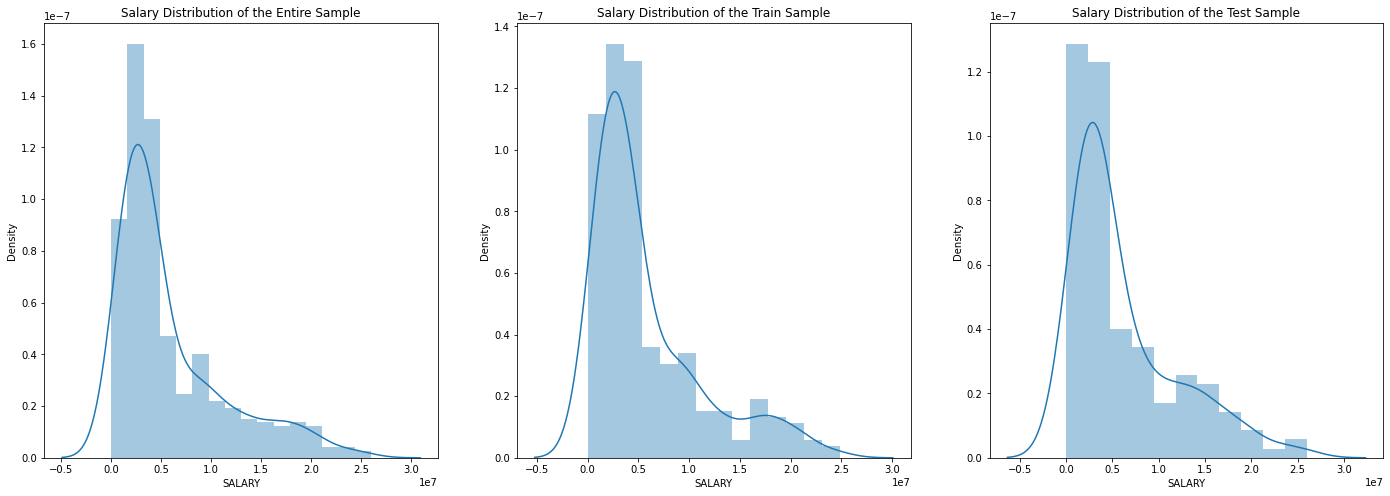

In [367]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,8))
sns.distplot(y, ax=ax1).set(title="Salary Distribution of the Entire Sample")
sns.distplot(y_train, ax=ax2).set(title="Salary Distribution of the Train Sample")
sns.distplot(y_test, ax=ax3).set(title="Salary Distribution of the Test Sample")
plt.show()

### Encode Categorical features and Align Train and Test columns

Categorical features is not accepted by any ML model. This should be encoded into Numerical Features in both datasets and then Align it to respect having the same features

In [368]:
def encoding(dataframe, categorical_features):

    encoder = OneHotEncoder().fit(dataframe[categorical_features])
    dataframe = pd.concat(
        [
            dataframe,
            pd.DataFrame(
                encoder.transform(dataframe[categorical_features]).toarray(),
                index=dataframe.index,
                columns=encoder.get_feature_names(categorical_features)
            )
        ],
        axis=1
    )
    dataframe.drop(categorical_features, axis=1, inplace=True)

    return dataframe

In [369]:
#Encode categorical features
X_train = encoding(X_train, cat_vars)
X_test  = encoding(X_test, cat_vars)

#Alignating Columns
X_train, X_test = X_train.align(X_test, join = 'inner', axis = 1)

In [370]:
print(X_train.shape, X_test.shape)

(298, 61) (148, 61)


### Feature Scaling

- Feature Scaling is the process of rescaling the attributes so that they have Mean as 0 and Variance as 1.

- The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values (this will help the Gradient Descent learn better and faster)
  
- In StandardScaler(), centering and scaling happens independently on each feature. The formula which performs standirization is X_scaled = (X - Mean)/Std.

Let´s clarify what the fit_tranform() and tranform() do, when to use each one of them and why. For the fit_tranform() method, the fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance. Now, we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case. Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data. If we were to use the fit method on our test data too, we would be computing a new mean and variance that is a new scale for each feature and would let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithms.

In [196]:
X_train.describe()

,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,HEIGHT,...,COUNTRY_Japan,COUNTRY_Lithuania,COUNTRY_Montenegro,COUNTRY_Serbia,COUNTRY_Slovenia,COUNTRY_Spain,COUNTRY_USA,POSITION_Center,POSITION_Forward,POSITION_Guard
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,4.711409,17.946309,328.360738,22.178523,9.681544,3.711409,1.870470,0.689933,0.378523,198.275168,...,0.003356,0.003356,0.003356,0.013423,0.006711,0.006711,0.758389,0.124161,0.369128,0.506711
std,3.980246,16.255653,264.233071,7.614328,4.931350,1.790605,1.281282,0.310912,0.264273,8.468885,...,0.057928,0.057928,0.057928,0.115270,0.081785,0.081785,0.428780,0.330320,0.483380,0.500796
min,0.000000,-1.000000,9.000000,3.000000,1.000000,0.500000,0.000000,0.000000,0.000000,175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,121.750000,17.100000,6.200000,2.300000,1.000000,0.500000,0.200000,193.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,14.000000,238.500000,22.350000,8.900000,3.500000,1.500000,0.700000,0.300000,198.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,8.000000,30.000000,503.000000,28.275000,12.600000,4.800000,2.475000,0.900000,0.500000,205.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,16.000000,60.000000,1085.000000,38.200000,23.800000,8.900000,5.700000,1.400000,1.200000,220.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
X_test.describe()

,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,HEIGHT,...,COUNTRY_Japan,COUNTRY_Lithuania,COUNTRY_Montenegro,COUNTRY_Serbia,COUNTRY_Slovenia,COUNTRY_Spain,COUNTRY_USA,POSITION_Center,POSITION_Forward,POSITION_Guard
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,...,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,4.229730,16.824324,313.125000,22.960811,10.005405,3.941216,1.903378,0.693243,0.408784,199.202703,...,0.013514,0.006757,0.006757,0.006757,0.006757,0.020270,0.756757,0.148649,0.439189,0.412162
std,3.829876,15.912480,270.177026,7.843804,4.879776,1.682439,1.187257,0.300490,0.273533,7.853211,...,0.115852,0.082199,0.082199,0.082199,0.082199,0.141402,0.430498,0.356950,0.497973,0.493895
min,0.000000,-1.000000,2.000000,2.800000,1.000000,1.000000,0.000000,0.000000,0.000000,182.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.750000,106.750000,17.875000,6.350000,2.800000,1.100000,0.500000,0.200000,193.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,12.500000,222.000000,23.850000,9.100000,3.600000,1.600000,0.700000,0.300000,200.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.000000,29.000000,458.250000,29.150000,13.700000,4.925000,2.500000,0.900000,0.500000,205.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,15.000000,58.000000,1085.000000,36.800000,23.900000,8.500000,5.700000,1.500000,1.200000,218.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [222]:
X_train_c = X_train.copy()
X_test_c = X_test.copy()

In [223]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

This should be the same Mean values of the Train dataset show above

In [224]:
scaler.mean_

array([4.71140940e+00, 1.79463087e+01, 3.28360738e+02, 2.21785235e+01,
       9.68154362e+00, 3.71140940e+00, 1.87046980e+00, 6.89932886e-01,
       3.78523490e-01, 1.98275168e+02, 9.70100671e+01, 2.64093960e+01,
       3.02013423e-02, 3.02013423e-02, 3.69127517e-02, 3.69127517e-02,
       3.02013423e-02, 3.35570470e-02, 3.69127517e-02, 3.02013423e-02,
       3.35570470e-02, 3.02013423e-02, 3.69127517e-02, 3.69127517e-02,
       4.36241611e-02, 3.02013423e-02, 3.69127517e-02, 1.34228188e-02,
       4.02684564e-02, 1.67785235e-02, 2.68456376e-02, 3.69127517e-02,
       3.69127517e-02, 3.69127517e-02, 2.68456376e-02, 4.36241611e-02,
       3.69127517e-02, 3.35570470e-02, 2.68456376e-02, 3.02013423e-02,
       3.02013423e-02, 1.67785235e-02, 6.71140940e-03, 3.69127517e-02,
       6.71140940e-03, 3.35570470e-03, 3.35570470e-03, 3.35570470e-03,
       1.67785235e-02, 2.01342282e-02, 3.35570470e-03, 3.35570470e-03,
       3.35570470e-03, 3.35570470e-03, 1.34228188e-02, 6.71140940e-03,
      

This should be the same Std values of the Train dataset show above

In [225]:
scaler.scale_

array([3.97356247e+00, 1.62283558e+01, 2.63789355e+02, 7.60154138e+00,
       4.92306872e+00, 1.78759822e+00, 1.27913054e+00, 3.10389443e-01,
       2.63829251e-01, 8.45466319e+00, 1.07829361e+01, 4.44581611e+00,
       1.71140940e-01, 1.71140940e-01, 1.88547608e-01, 1.88547608e-01,
       1.71140940e-01, 1.80086012e-01, 1.88547608e-01, 1.71140940e-01,
       1.80086012e-01, 1.71140940e-01, 1.88547608e-01, 1.88547608e-01,
       2.04257420e-01, 1.71140940e-01, 1.88547608e-01, 1.15076699e-01,
       1.96588168e-01, 1.28440666e-01, 1.61632142e-01, 1.88547608e-01,
       1.88547608e-01, 1.88547608e-01, 1.61632142e-01, 2.04257420e-01,
       1.88547608e-01, 1.80086012e-01, 1.61632142e-01, 1.71140940e-01,
       1.71140940e-01, 1.28440666e-01, 8.16478192e-02, 1.88547608e-01,
       8.16478192e-02, 5.78311676e-02, 5.78311676e-02, 5.78311676e-02,
       1.28440666e-01, 1.40459393e-01, 5.78311676e-02, 5.78311676e-02,
       5.78311676e-02, 5.78311676e-02, 1.15076699e-01, 8.16478192e-02,
      

In [226]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

This should all be 0, or values really near to 0 as below...

In [228]:
X_train_scaled.mean(axis=0)

array([-1.49023225e-17,  4.47069674e-17,  6.85506834e-17,  4.09813868e-17,
       -1.25179509e-16, -4.76874319e-17, -1.84788799e-16, -6.25897544e-17,
        1.19218580e-16, -1.66011872e-15,  2.83144127e-16, -4.00872475e-16,
       -3.27851095e-17, -4.76874319e-17, -3.87460384e-17, -3.65106901e-17,
       -5.81190577e-17, -6.55702189e-17, -5.21581287e-17, -4.61971997e-17,
       -4.17265029e-17, -5.66288254e-17, -4.17265029e-17, -3.80009223e-17,
       -1.78827870e-17, -4.32167352e-17, -4.76874319e-17,  1.49023225e-17,
        2.08632515e-17,  2.98046450e-18, -2.38437160e-17, -3.57655739e-17,
       -5.36483609e-17, -3.57655739e-17, -6.55702189e-17,  2.98046450e-18,
       -3.87460384e-17, -5.36483609e-17, -8.34530059e-17, -4.76874319e-17,
       -5.96092899e-17,  8.94139349e-18, -5.96092899e-18, -3.80009223e-17,
       -1.19218580e-17,  0.00000000e+00, -1.19218580e-17, -5.36483609e-17,
        2.08632515e-17,  7.15311479e-17, -4.17265029e-17, -1.78827870e-17,
       -4.17265029e-17, -

This should all be 1, or values really near to 1

In [229]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

The dataset should have its values tranform (scaled...), let´s see how the first row look like

In [232]:
X_test_scaled[0]

array([-0.17903566,  0.68113439, -0.03169475,  0.47641344,  0.5724999 ,
        1.28026006,  2.29025115,  2.28766516, -0.29762996, -0.62393589,
       -1.48475953, -0.31701626, -0.17647059, -0.17647059, -0.19577417,
       -0.19577417, -0.17647059, -0.186339  , -0.19577417, -0.17647059,
       -0.186339  , -0.17647059, -0.19577417, -0.19577417, -0.21357443,
       -0.17647059, -0.19577417, -0.11664237, -0.20483662, -0.13063249,
       -0.16609096, -0.19577417, -0.19577417, -0.19577417,  6.02079729,
       -0.21357443, -0.19577417, -0.186339  , -0.16609096, -0.17647059,
       -0.17647059, -0.13063249, -0.08219949, -0.19577417, -0.08219949,
       -0.05802589, -0.05802589, -0.05802589, -0.13063249, -0.14334554,
       -0.05802589, -0.05802589, -0.05802589, -0.05802589, -0.11664237,
       -0.08219949, -0.08219949,  0.56443252, -0.37651355, -0.76492247,
        0.98666607])

Now we have seen and demostrated how this class and its respectives methods work, let´s make a functions which make all this much "cleaner"

In [371]:
def scaling(X_train, X_test, columns):

  scaler = StandardScaler()
  
  X_train[columns] = scaler.fit_transform(X_train[columns])
  X_test[columns] = scaler.transform(X_test[columns])
  
  return X_train, X_test

In [372]:
X_train, X_test = scaling(X_train, X_test, X_train.columns)

All the steps had been done separetly to ilustrate and demostrate concepts about them, but it´s more convinience to have a function which does all this in one step.

This function is define below as **data_preprocessing** and is defined on the preprocessing.py file.

In [5]:
cat_vars, num_vars = aux.cat_vs_num(data)
X_train, X_test, y_train, y_test = preprocessing.data_preprocessing(data, num_vars, cat_vars, data.columns)

In [6]:
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (298, 61) y_train.shape (298,)
X_test.shape (148, 61) y_test.shape (148,)


### Dimensionality Reduction: PCA (Principal Component Analysis)

Here goes a completely non-mathematical take on PCA I read...

Imagine you have just opened a cider shop. You have 50 varieties of cider and you want to work out how to allocate them onto shelves, so that similar-tasting ciders are put on the same shelf. There are lots of different tastes and textures in cider - sweetness, tartness, bitterness, yeastiness, fruitiness, clarity, fizziness etc etc. So what you need to do to put the bottles into categories is answer two questions:

1) What qualities are most important for identifying groups of ciders? e.g. does classifying based on sweetness make it easier to cluster your ciders into similar-tasting groups than classifying based on fruitiness?

2) Can we reduce our list of variables by combining some of them? e.g. is there actually a variable that is some combination of "yeastiness and clarity and fizziness" and which makes a really good scale for classifying varieties?

This is essentially what PCA does. Principal components are variables that usefully explain variation in a data set - in this case, that usefully differentiate between groups. Each principal component is one of your original explanatory variables, or a combination of some of your original explanatory variables.


Why should I even consider doing this? 

First of all, for visualization purposes, you can not plot any graphic above 3 dimensions. Then, to speed up the training process. In this particular case we would not need to do so as the dataset is very small, but imagine having a dataset with millions of rows and thousands of columns or at the moment of working with images...

## Applying PCA

- How to use the PCA() function from sklearn to do PCA.
- How to determine how much variation each principal component accounts for

### How to use the PCA() function from sklearn to do PCA.

First, make sure the data is scaled and centered (After centering, the Mean value for each feature will be 0, and after scaling, the Std will be 1). 

He have just checked this, only the Training data satisfy this demands. But, luckily for us the PCA class will center the data for us when is not. So, I am going to concatenate both datasets to visualize my whole Features vs Salary Distribution.

OBS: Also, it has been demostrated after the splitting of the dataset that the Training Dataset sample "represent" well enough the behavour of the whole dataset

In [28]:
from sklearn.decomposition import PCA, TruncatedSVD

In [421]:
df_all = pd.concat([X_train, X_test])

In [429]:
pca = PCA()
principalComponents = pca.fit_transform(df_all)
print(principalComponents.shape)

(446, 61)


### How to determine how much variation each principal component accounts for

In [430]:
per_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(per_var)


[  7.13  13.19  17.31  20.74  23.78  26.74  29.54  32.19  34.8   37.21
  39.54  41.84  44.06  46.18  48.24  50.28  52.24  54.17  56.04  57.86
  59.63  61.35  63.02  64.66  66.27  67.83  69.38  70.91  72.43  73.94
  75.4   76.84  78.23  79.57  80.91  82.24  83.52  84.79  86.04  87.27
  88.47  89.64  90.78  91.88  92.93  93.94  94.9   95.83  96.66  97.34
  97.93  98.38  98.75  99.1   99.35  99.58  99.79  99.92  99.98 100.03
 100.03]


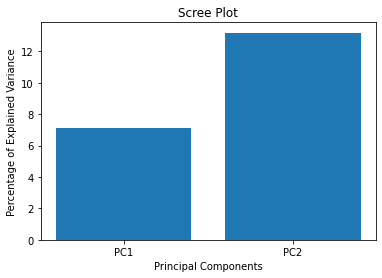

In [432]:
per_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:2] #If you want to see how much variation each PCA retianed, eliminate the np.cumsum as on the example above
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()

Conclutions: In this particular case, PCA will not be useful for us as its Principals components do not represent well the initial data information (just around 14% of information is retained). Let´s see how it performs with another Dimensionality technique such as TruncatedSVD

(446, 2)


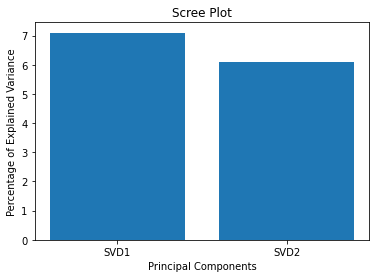

In [433]:
svd = TruncatedSVD(algorithm='randomized', random_state=42)
princ_comps = svd.fit_transform(df_all)
print(princ_comps.shape)

per_var = np.round(svd.explained_variance_ratio_* 100 , decimals=1)[0:2]
labels = ["SVD" + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()

# Advice for Applying Machine Learning

We will explore techniques to evaluate and improve our ML models

## Evaluating a Learning Algorithm

Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training", "Validation" and "Test" sets.
    * Use the training data to fit the parameters of the model
    * Use the validation data to tune hyperparameters of the model such as Regularization
    * Use the test data to evaluate the model on *new* data
* Select an error function to evaluate your model (Evaluation Metric).

All this will also be implemented with Scikit-Learn classes and methods, let´s try to approach the resolution of the problem from the "simplest" way possible up until the most "complex".

In [7]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.model_selection import cross_validate, learning_curve

import warnings
warnings.filterwarnings("ignore")

In [8]:
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

print(X_train.shape, type(X_train))
print(X_test.shape, type(X_test))
print(y_train.shape, type(y_train))
print(y_test.shape, type(y_test))

(298, 61) <class 'numpy.ndarray'>
(148, 61) <class 'numpy.ndarray'>
(298,) <class 'numpy.ndarray'>
(148,) <class 'numpy.ndarray'>


### Naive Approach - Without Cross-Validation 

In [262]:
lr = SGDRegressor(max_iter=100000000) 
lr.fit(X_train, y_train)

#Training Set
y_pred_tr = lr.predict(X_train)
error_tr = metrics.mean_squared_error(y_train, y_pred_tr)

#Test Set
y_pred_test = lr.predict(X_test)
error_test = metrics.mean_squared_error(y_test, y_pred_test)

print(f"Training MSE Error {error_tr:0.2f}, Test MSE Error {error_test:0.2f}")
print('Train/Test: {}'.format(round(error_test/error_tr, 1)))

Training MSE Error 16419134163137.17, Test MSE Error 28443851702207.79
Train/Test: 1.7


When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:

- A model is trained using k-1 of the folds as training data;

- The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data.

### Implementing Cross-Validation

We are going to use the cross_validate method. This will enable us to specify multiple metrics for evaluation. Also, it returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

In [265]:
scores = cross_validate(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=5, return_train_score=True)

OBS: Scoring — indicates the error metric to use; the intention is to use the mean squared error (MSE) metric, but that’s not a possible parameter for scoring; we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs later on.

In [266]:
error_cv = aux.calculating_error(scores, "test_score")
error_tr = aux.calculating_error(scores, "train_score")
print(f"Training RMSE Error {error_tr:0.2f}, CV RMSE Error {error_cv:0.2f}")
print('Train/Validation: {}'.format(round(error_cv/error_tr, 1)))

Training RMSE Error 15254611252736.94, CV RMSE Error 32714548571765.29
Train/Validation: 2.1


Our training error is somewhat lower than the test error. In fact, the test error is 2.1 times or 110% worse. It’s a big difference worth investigating.

### Plotting the Learning Curve 

In [327]:
train_sizes, train_scores, validation_scores = learning_curve(lr, X_train, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5), shuffle=True, random_state=1)

In [315]:
print("Train Sized:", train_sizes)

Train Sized: [  2  61 120 179 238]


In [316]:
print("Training Scores:", train_scores)

Training Scores: [[-5.12204173e+02 -1.76568000e+02 -2.12598932e+02 -3.49420527e+02
  -1.81035458e+02]
 [-7.13807053e+12 -3.16524993e+12 -5.18483294e+12 -4.35546992e+12
  -2.71620258e+12]
 [-9.54247491e+12 -1.02693615e+13 -1.00556907e+13 -9.50661576e+12
  -1.08737629e+13]
 [-1.23068119e+13 -1.49201878e+13 -1.15592599e+13 -1.33448831e+13
  -1.49063301e+13]
 [-1.66889171e+13 -1.60185368e+13 -1.34485960e+13 -1.48255340e+13
  -1.52266106e+13]]


In [317]:
print("Validation Scores:", validation_scores)

Validation Scores: [[-5.77491672e+13 -4.27135433e+13 -1.04535296e+14 -5.68298528e+13
  -4.99198548e+13]
 [-3.92810520e+13 -1.09916057e+14 -7.38425956e+13 -4.54524795e+13
  -4.80036678e+13]
 [-2.62475650e+13 -3.61223222e+13 -5.75271722e+13 -4.38692909e+13
  -2.77258560e+13]
 [-2.33042516e+13 -2.78846662e+13 -5.36792018e+13 -3.17205408e+13
  -2.62041457e+13]
 [-1.93119264e+13 -3.25278457e+13 -5.06318246e+13 -3.28983205e+13
  -2.78915900e+13]]


They run 5 (K-Fold selected) experiments per test, that´s why we recieved an (5,5) array. Then we will calculate the Mean of the positive values.

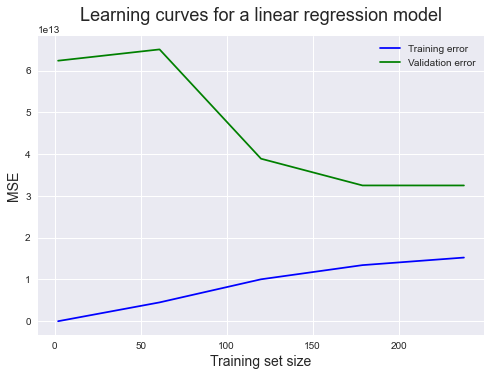

In [328]:
visualizations.plot_learning_curve(train_sizes, train_scores, validation_scores, "MSE", "Training set size", "Learning curves for a linear regression model", False)

### Bias and Variance

How can you choose a good Model? And why we are so interested on the Training and CV Erros?

It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of hyperparameters, the training and cross-validation performance can be evaluated. In another words, we will be seeing if the model is Overfitted or Underfitted

Diagnosing Bias and Variance: How do you tell if your algorithm has a bias or variance problem?

**Bias**

The main indicator of a bias problem is a high validation error. But is it a low bias problem or a high bias problem?

To find the answer, we need to look at the training error. If the training error is very low, it means that the training data is fitted very well by the estimated model. If the model fits the training data very well, it means it has low bias with respect to that set of data. If the training error is high, it means that the training data is not fitted well enough by the estimated model. If the model fails to fit the training data well, it means it has high bias with respect to that set of data.

- High bias when the Cost function of the Training set is high
- Low bias when the Cost function of the Training set is low 

**Variance**

Estimating variance can be done in at least two ways:

- By examining the gap between the validation learning curve and training learning curve.
- By examining the training error: its value and its evolution as the training set sizes increase.

A narrow gap indicates low variance. Generally, the more narrow the gap, the lower the variance. The opposite is also true: the wider the gap, the greater the variance. Being, gap = val_error - tr_error.
High training error scores are also a quick way to detect low variance. So, to summarize:

- High variance when the gap between the validation and training is large
- Low variance when the gap between the validation and training is small

Let´s begin by "Diagnosing" bias and variance on our model previously trained. We have a Training error approximately two times lower than the Validation one, in addition to a high validation error. So, we are facing a low bias problem. Then, the gap between our learning curves is huge, hence we will also be dealing with a high variance issue. To conclude, we have an overfitting problem.

How can we improve this?

Adding more instances to the training data is hugely likely to improve the model performace, asi it´s going to increase the training error while reducing the validation one. Then, we know we want a less complex model. The most common way to achieve this is by adding Regularizators to the algorithm, they prevent the algorithm from fitting the training data too well. We will start by this last suggestion of adding regularizators to the Lineal Regressor. And we will leave the first one for later, as it is way more time consuming and difficult.

Now it is when the GridSearchCV comes in handy, to start trying different combinatins of hyperparameters.

In [13]:
from sklearn.model_selection import GridSearchCV
import time

In [330]:
parameters = {
    'penalty':('l2', 'l1', 'elasticnet'), #The 3 differnt Regularization techniques
    'alpha':[0.001, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6], #Constant that multiplies the regularization term. The higher the value, the stronger the regularization
    'eta0':[0.0001, 0.001, 0.01], #The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.01.
    'max_iter':[100000000], #Epochs
    }

estimator = SGDRegressor()
grid = GridSearchCV(estimator, param_grid=parameters, cv=3, scoring="neg_mean_squared_error", return_train_score=True)
inicio = time.time()
grid.fit(X_train, y_train)
fin = time.time()
print("The time it takes to fit the model is",round(fin-inicio),"seconds.")
print("Best params: "+str(grid.best_params_))

The time it takes to fit the model is 300 seconds.
Best params: {'alpha': 0.6, 'eta0': 0.001, 'max_iter': 100000000, 'penalty': 'l2'}


In [333]:
aux.get_errors(grid.cv_results_)

Training RMSE Error 16380434714908.05, CV RMSE Error 24901273974011.86
Train/Validation: 1.5


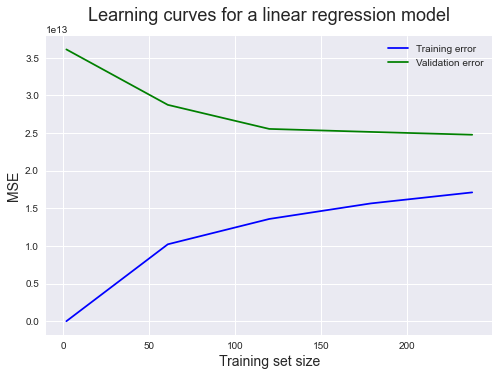

In [336]:
train_sizes, train_scores, validation_scores = learning_curve(grid.best_estimator_, X, y, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5), shuffle=True, random_state=1)
visualizations.plot_learning_curve(train_sizes, train_scores, validation_scores, "MSE", "Training set size", "Learning curves for a linear regression model")

Considerating that the best alpha was 0.6, the biggest one of the list, let´s try another round with even bigger values

In [337]:
parameters = {
    'penalty':('l2', 'l1', 'elasticnet'), #The 3 differnt Regularization techniques
    'alpha':[0.3, 0.6, 0.75, 0.9, 1.05, 1.3, 1.45], #Constant that multiplies the regularization term. The higher the value, the stronger the regularization
    'eta0':[0.0001, 0.001, 0.01], #The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.01.
    'max_iter':[100000000], #Epochs
    }

estimator = SGDRegressor()
grid = GridSearchCV(estimator, param_grid=parameters, cv=3, scoring="neg_mean_squared_error", return_train_score=True)
inicio = time.time()
grid.fit(X_train, y_train)
fin = time.time()
print("The time it takes to fit the model is",round(fin-inicio),"seconds.")
print("Best params: "+str(grid.best_params_))

The time it takes to fit the model is 175 seconds.
Best params: {'alpha': 1.3, 'eta0': 0.01, 'max_iter': 100000000, 'penalty': 'l2'}


In [338]:
aux.get_errors(grid.cv_results_)

Training RMSE Error 17754887455415.61, CV RMSE Error 24095479374958.51
Train/Validation: 1.4


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


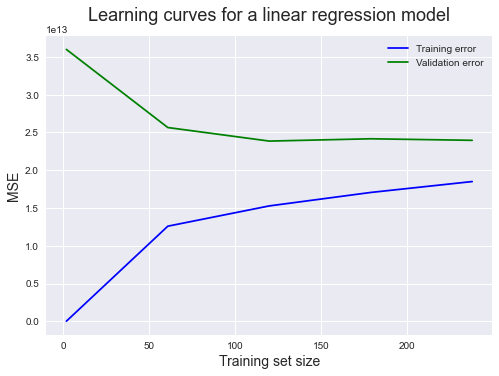

In [339]:
train_sizes, train_scores, validation_scores = learning_curve(grid.best_estimator_, X, y, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5), shuffle=True)
visualizations.plot_learning_curve(train_sizes, train_scores, validation_scores, "MSE", "Training set size", "Learning curves for a linear regression model")

Maximum number of iteration had been reached before convergence, we could make another search considerating this and trying to find a even more accurate value for the other hyperparameters

In [19]:
parameters = {
    'penalty':('l2', 'l1', 'elasticnet'), #The 3 differnt Regularization techniques
    'alpha':[1.3, 1.35, 1.40, 1.45], #Constant that multiplies the regularization term. The higher the value, the stronger the regularization
    'eta0':[0.0001, 0.001, 0.01, 0.012, 0.014], #The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.01.
    'max_iter':[100000000,1000000000], #Epochs
    }

estimator = SGDRegressor()
grid = GridSearchCV(estimator, param_grid=parameters, cv=3, scoring="neg_mean_squared_error", return_train_score=True)
inicio = time.time()
grid.fit(X_train, y_train)
fin = time.time()
print("The time it takes to fit the model is",round(fin-inicio),"seconds.")
print("Best params: "+str(grid.best_params_))

The time it takes to fit the model is 184 seconds.
Best params: {'alpha': 1.3, 'eta0': 0.012, 'max_iter': 100000000, 'penalty': 'l2'}


In [20]:
aux.get_errors(grid.cv_results_)

Training RMSE Error 17650921506920.72, CV RMSE Error 23809086201043.35
Train/Validation: 1.3


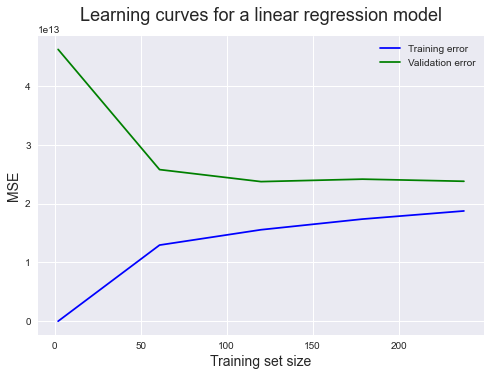

In [358]:
train_sizes, train_scores, validation_scores = learning_curve(grid.best_estimator_, X_train, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5), shuffle=True, random_state=1)
visualizations.plot_learning_curve(train_sizes, train_scores, validation_scores, "MSE", "Training set size", "Learning curves for a linear regression model")

The graphic has that particular shape because of how the tests sizes had been chosen, let´s see difference with some new values...

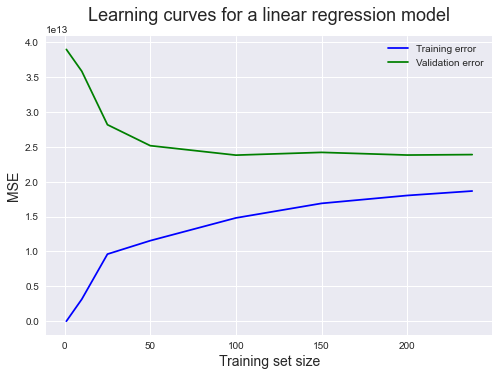

In [361]:
train_sizes, train_scores, validation_scores = learning_curve(grid.best_estimator_, X_train, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, train_sizes=[1,10,25,50,100,150,200,238], shuffle=True, random_state=1)
visualizations.plot_learning_curve(train_sizes, train_scores, validation_scores, "MSE", "Training set size", "Learning curves for a linear regression model")

We have managed to drastically reduced the gap between both error. If we see the plot, we can notice that the curves had not fully converged, so in this cases and as we have mentioned on the diagnosis, the addition of new data could really help to improve the performance of the model. 

### DecisionTreeRegressor

It is possible that this problem might not be easily resolvable by a linear model, or that there could be better types of algorithms to tackle it. As an example, let's try with a very used algorithm, a Decision Tree.



We will use again all variables, and try different configuration for the following hyperparameters:

- max_depth
- min_samples_leaf
- max_features

These are all regularization hyperparameters for this algorithm. 

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [391]:
dtr = DecisionTreeRegressor()
scores = cross_validate(dtr, X_train, y_train, scoring="neg_mean_squared_error", cv=5, return_train_score=True)

In [393]:
error_cv = aux.calculating_error(scores, "test_score")
error_tr = aux.calculating_error(scores, "train_score")
print(f"Training RMSE Error {error_tr:0.2f}, CV RMSE Error {error_cv:0.2f}")
print('Train/Validation: {}'.format(round(error_cv/error_tr, 1)))

Training RMSE Error 0.00, CV RMSE Error 35293060289685.95
Train/Validation: 1.6794021317029407e+18


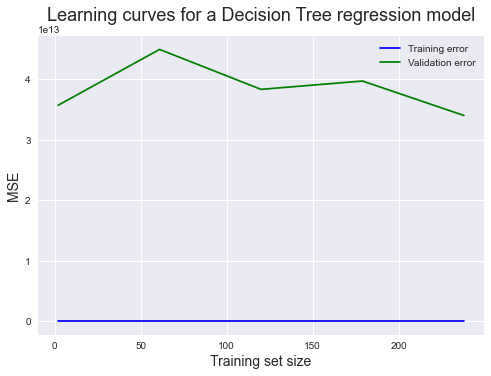

In [394]:
train_sizes, train_scores, validation_scores = learning_curve(dtr, X_train, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, train_sizes=[1,10,25,50,100,150,200,238], shuffle=True, random_state=1)
visualizations.plot_learning_curve(train_sizes, train_scores, validation_scores, "MSE", "Training set size", "Learning curves for a Decision Tree regression model")

In [23]:
parameters = {
    'max_depth':(1, 2, 3, 4, 5), 
    'max_features':(1, 2, 3, 4, 5, 'sqrt', 'log2'),
    'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    }

estimator = DecisionTreeRegressor(random_state=0)
grid_dtr = GridSearchCV(estimator, param_grid=parameters, cv=3, scoring="neg_mean_squared_error", return_train_score=True)
inicio = time.time()
grid_dtr.fit(X_train, y_train)
fin = time.time()
print("The time it takes to fit the model is",round(fin-inicio),"seconds.")
print("Best params: "+str(grid_dtr.best_params_))

The time it takes to fit the model is 2 seconds.
Best params: {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 2}


In [24]:
aux.get_errors(grid_dtr.cv_results_)

Training RMSE Error 22491213030547.31, CV RMSE Error 23103946587005.53
Train/Validation: 1.0


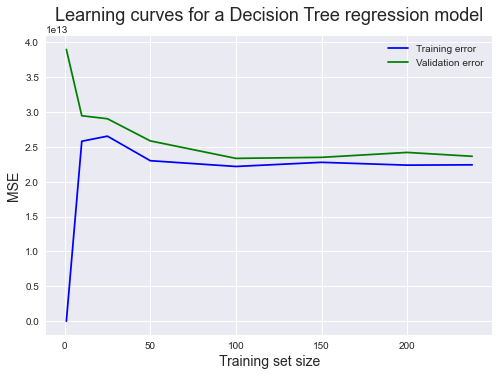

In [403]:
train_sizes, train_scores, validation_scores = learning_curve(grid_dtr.best_estimator_, X_train, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, train_sizes=[1,10,25,50,100,150,200,238], shuffle=True, random_state=1)
visualizations.plot_learning_curve(train_sizes, train_scores, validation_scores, "MSE", "Training set size", "Learning curves for a Decision Tree regression model")

### Analyzing our results

So, trying different learning algorithms and tunning different hyperparameters we have got a MSE error of 23e+13, which at a starting point was of 32e+13. Let´s see how it performs with the test data we have left outside the training and tunning process, to remain "unseen" from the model, the best estimator found.

In [26]:
#Test Set
y_pred_test = grid_dtr.predict(X_test)
error_test = metrics.mean_squared_error(y_test, y_pred_test)

print(f"Test MSE Error {error_test:0.2f}")

Test MSE Error 26304356677912.46
